In [1]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle


# Loading dataset

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/lending_data.csv")
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
data.shape

(77536, 8)

In [4]:
data.dtypes

,0
loan_size,float64
interest_rate,float64
borrower_income,int64
debt_to_income,float64
num_of_accounts,int64
derogatory_marks,int64
total_debt,int64
loan_status,int64


In [5]:
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64


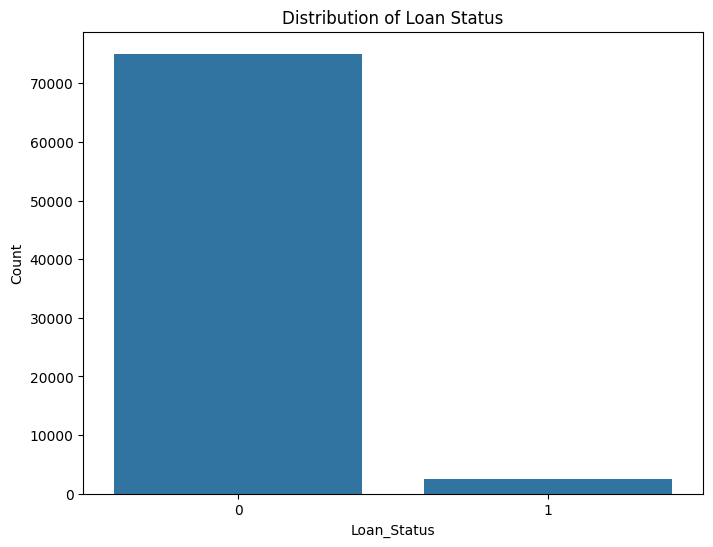

In [6]:
class_counts = data['loan_status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [7]:
data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


# Handling Missing values

In [8]:
missing_values = data.isnull().sum()

In [9]:
missing_values

,0
loan_size,0
interest_rate,0
borrower_income,0
debt_to_income,0
num_of_accounts,0
derogatory_marks,0
total_debt,0
loan_status,0


# Outliers detection

In [10]:
features=[]
from scipy import stats
import seaborn as sns
for col in data.columns:
  features.append(col)
print(features)


['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status']


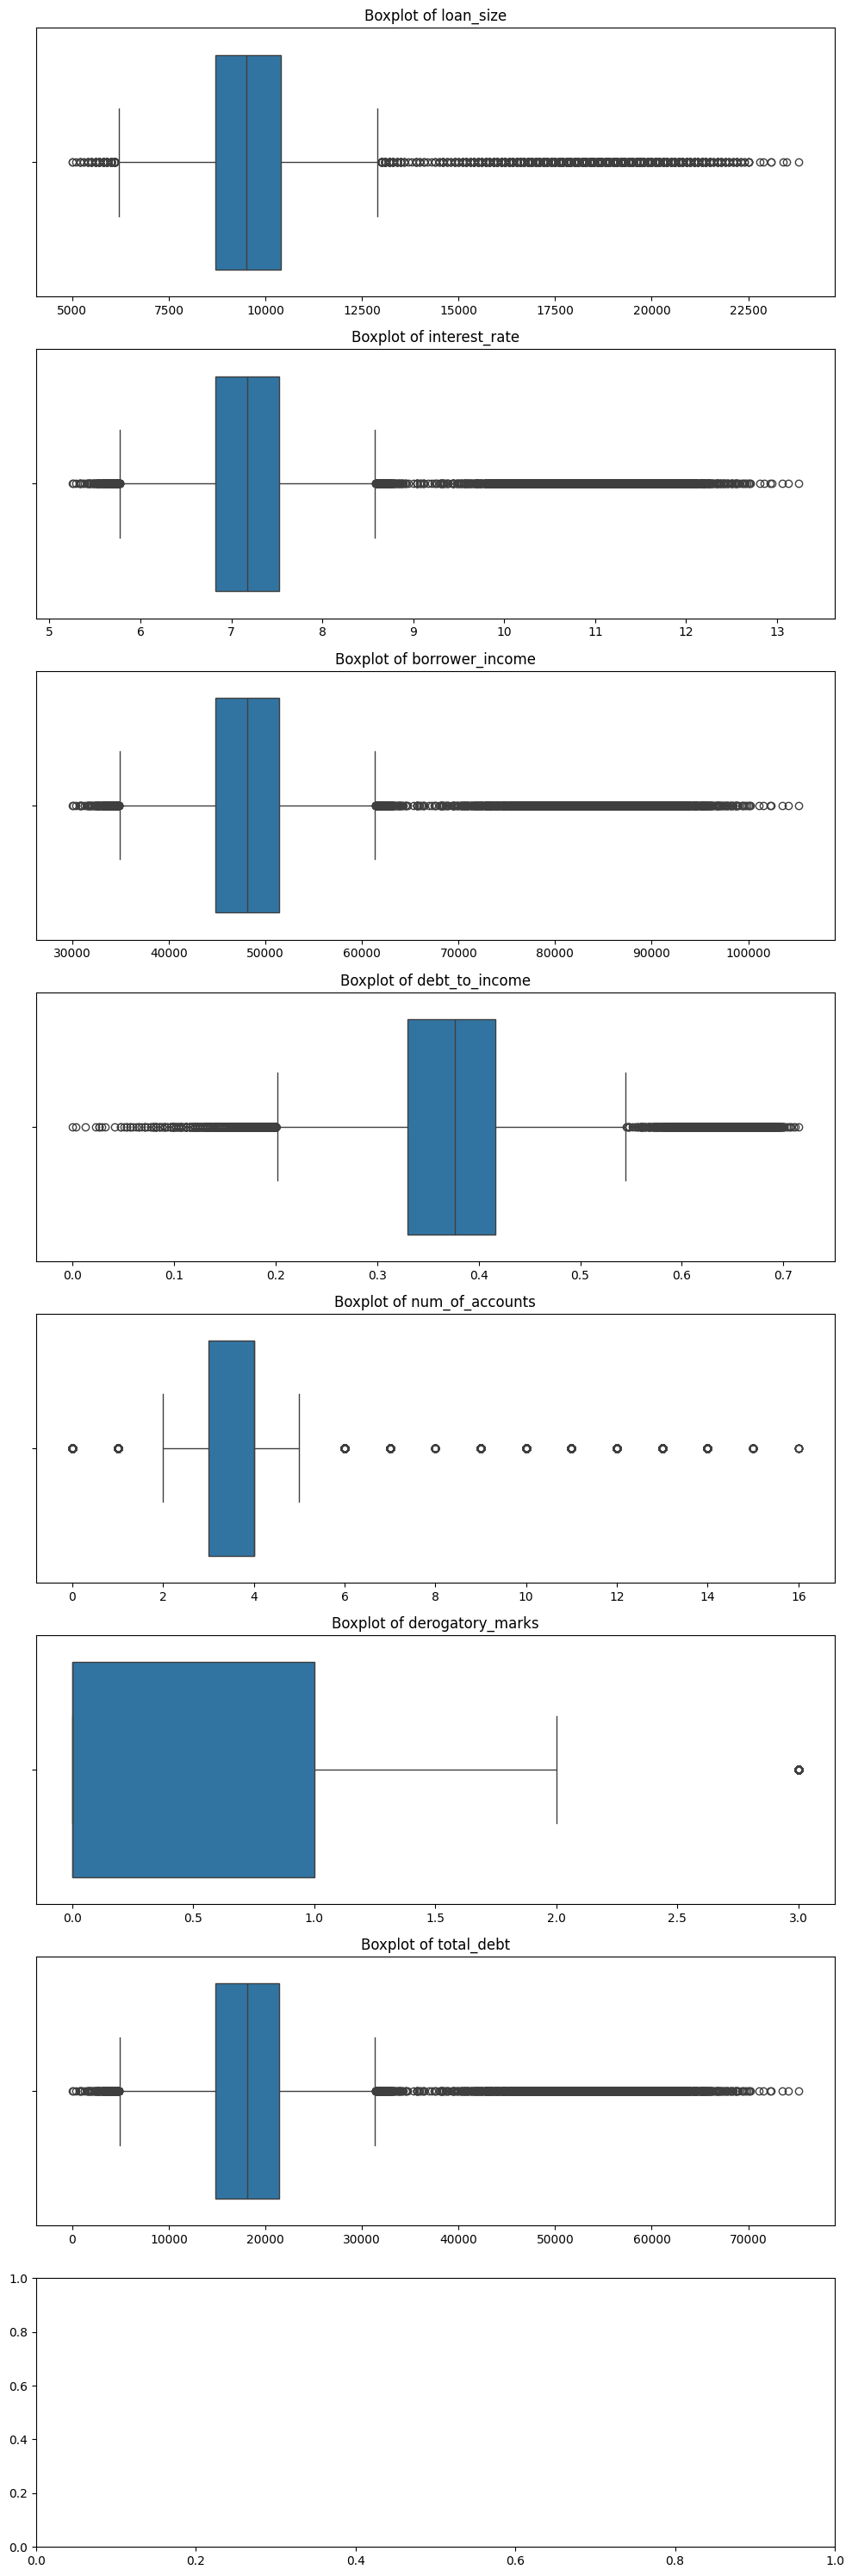

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

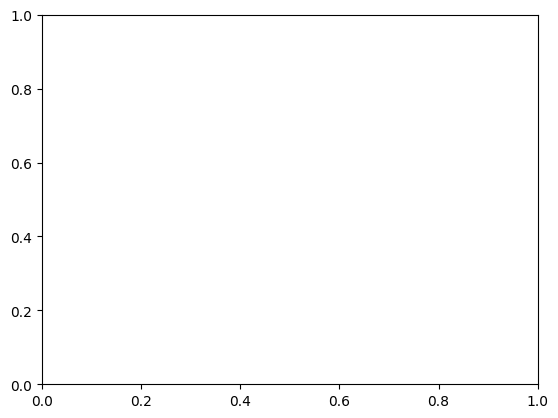

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30))
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')

plt.tight_layout()

plt.show()
plt.xticks(rotation=0)

In [12]:
features.pop()

'loan_status'

# Handling Outliers

In [13]:
from scipy.stats.mstats import winsorize

winsorize_percentage = 0.07

data[features] = data[features].apply(lambda x: winsorize(x, limits=winsorize_percentage))


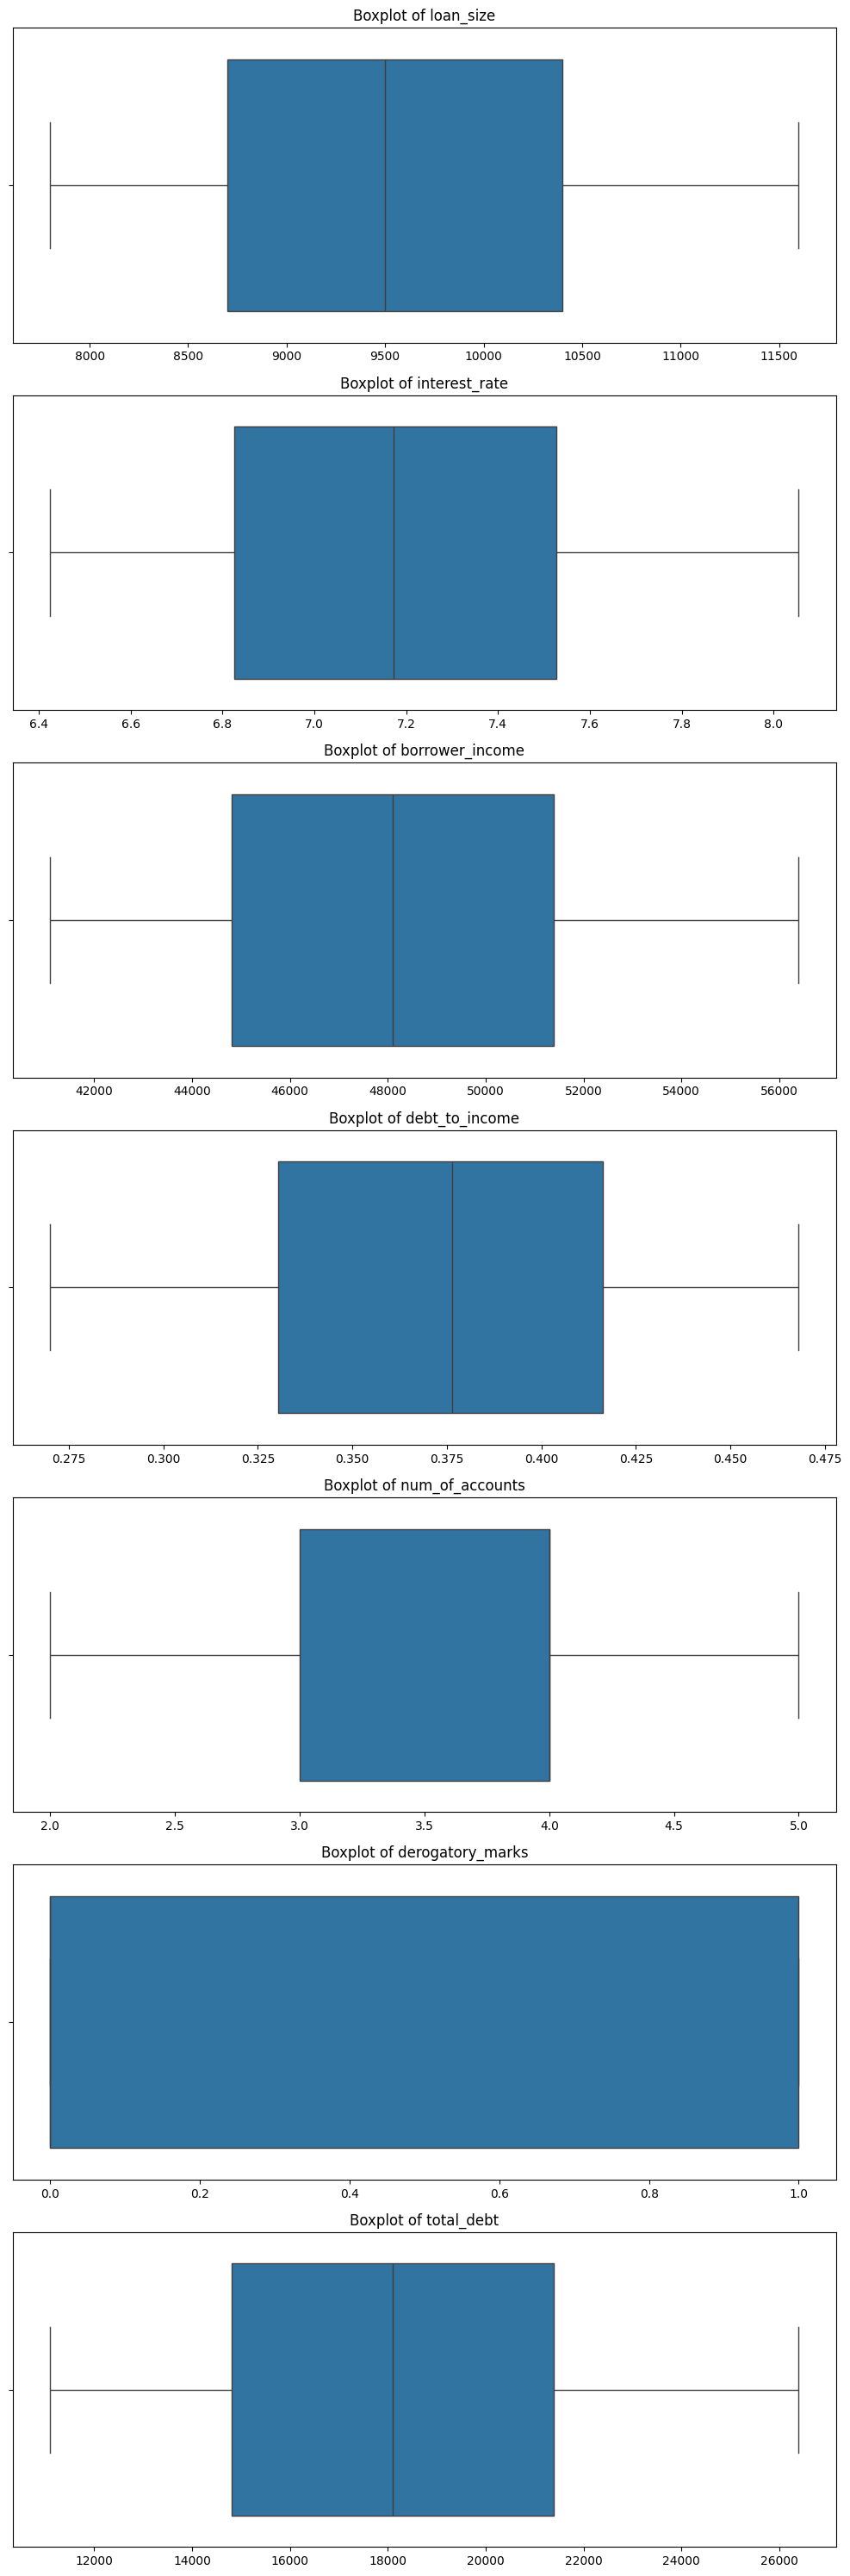

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

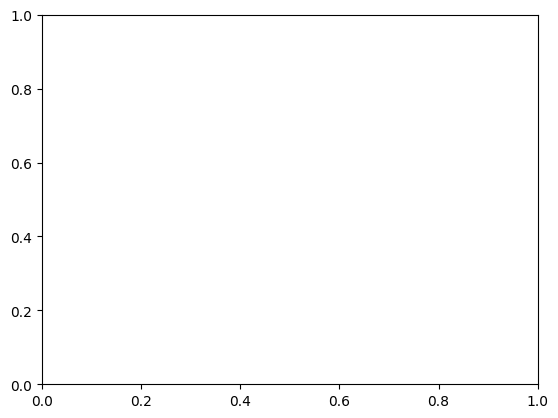

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30))
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')

plt.tight_layout()

plt.show()
plt.xticks(rotation=0)

# Feature Engineering

In [15]:
data['income_to_loan_ratio'] = data['borrower_income'] / data['loan_size']

# EDA -Exploratory Data Analysis

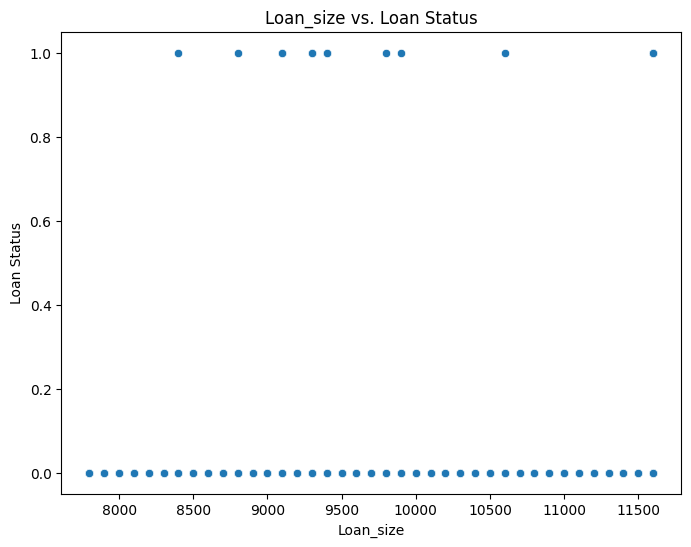

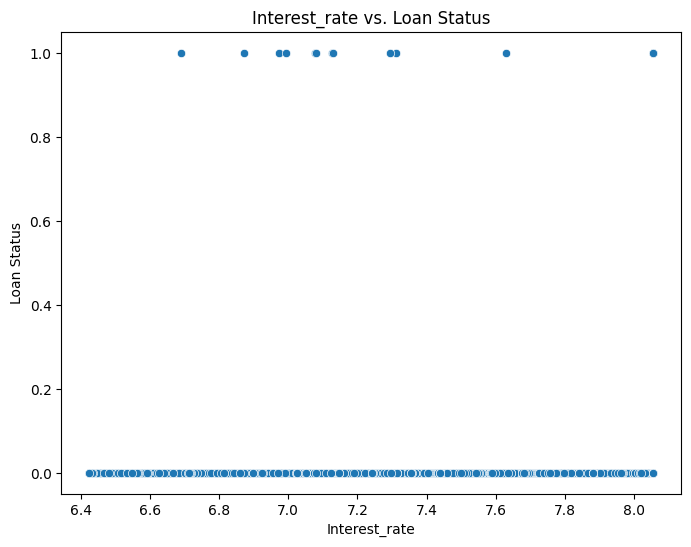

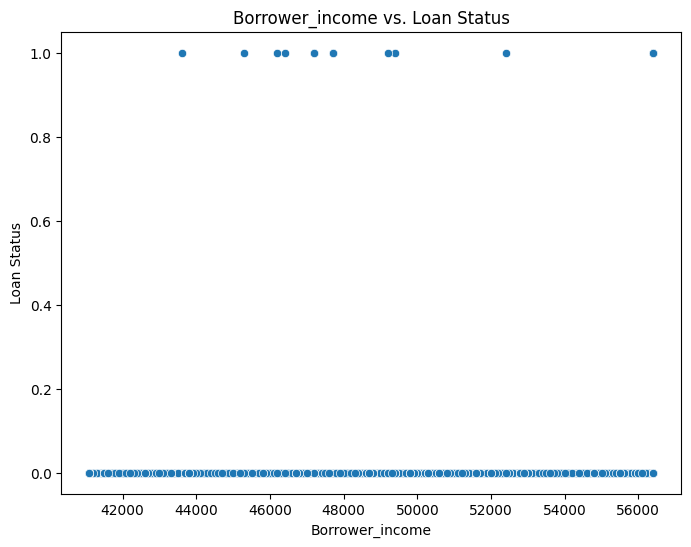

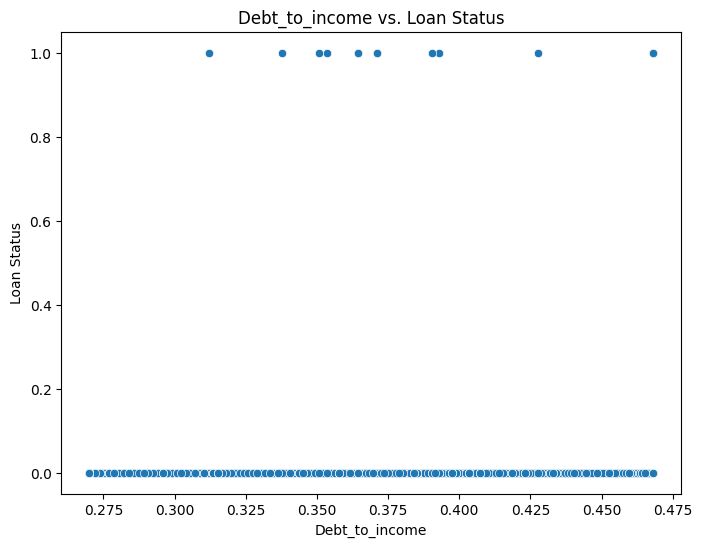

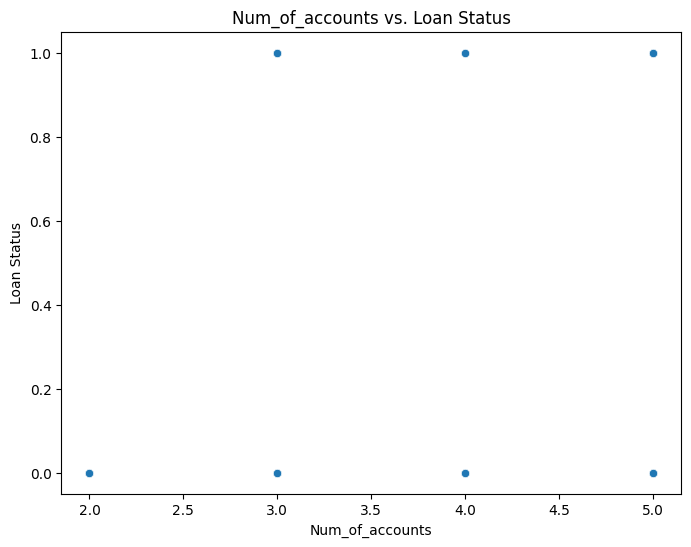

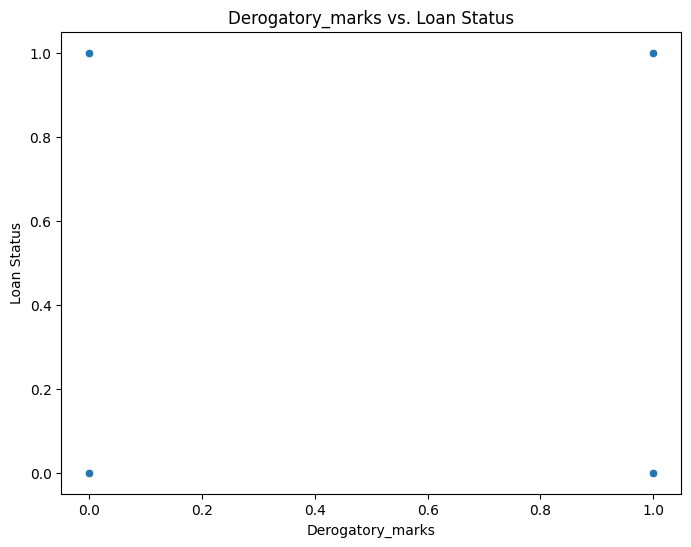

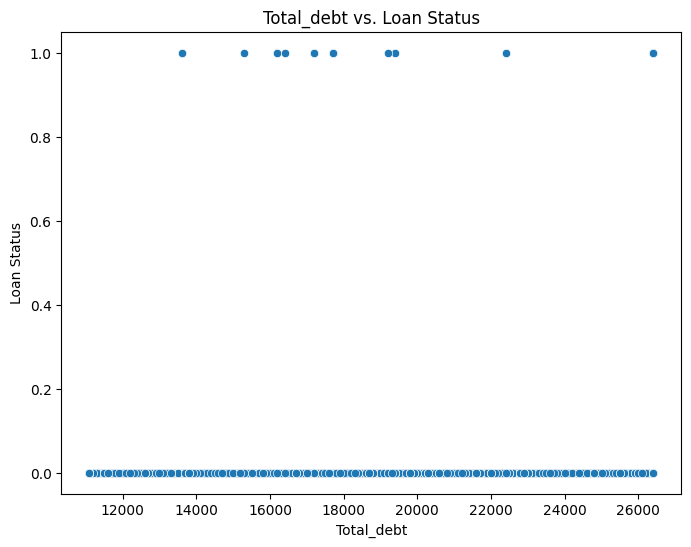

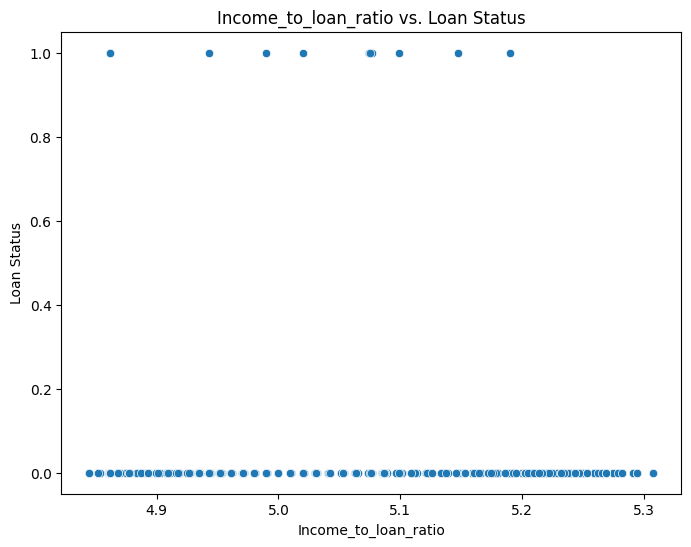

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
                      'num_of_accounts', 'derogatory_marks', 'total_debt','income_to_loan_ratio']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='loan_status', data=data)
    plt.title(f'{feature.capitalize()} vs. Loan Status')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Loan Status')
    plt.show()

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


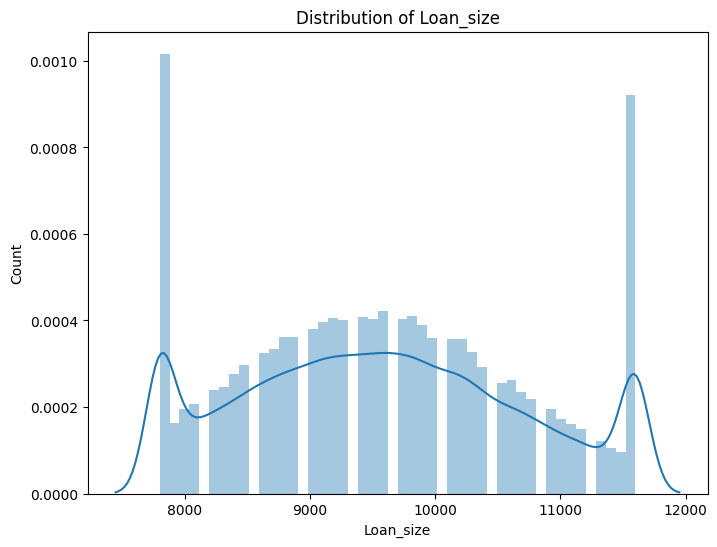

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


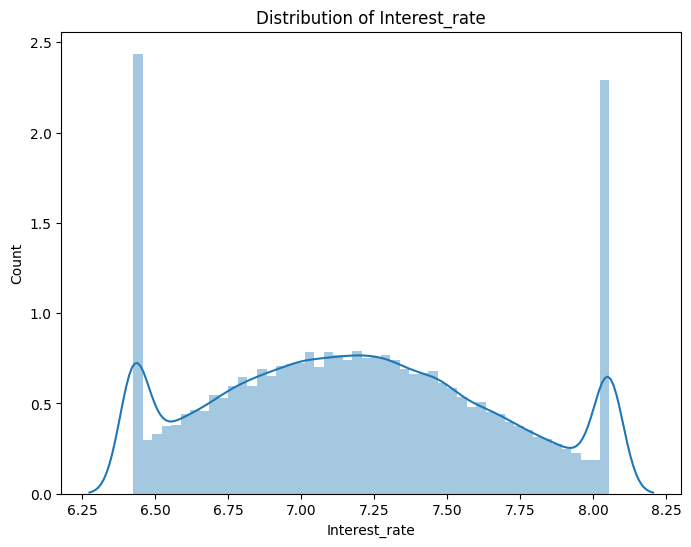

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


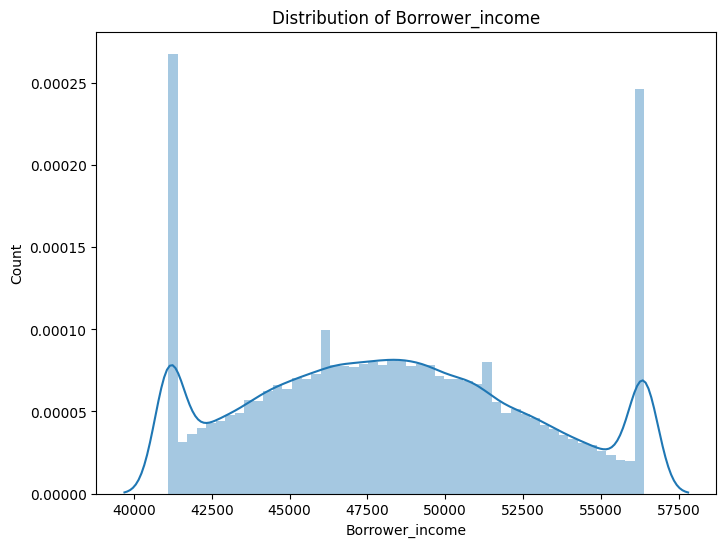

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


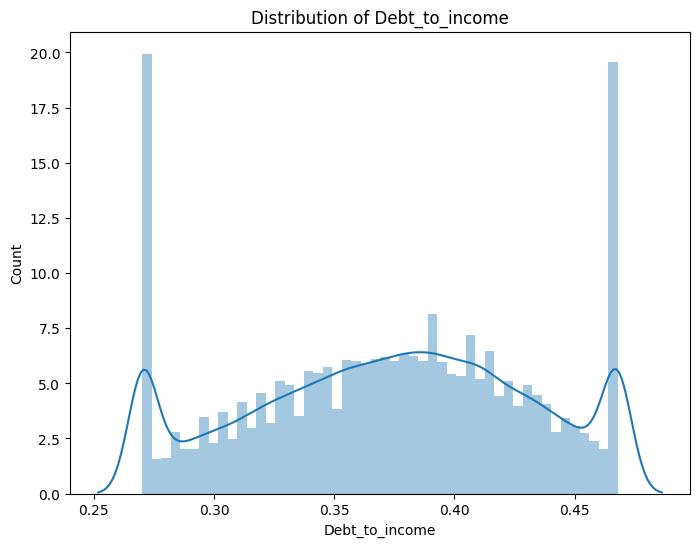

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


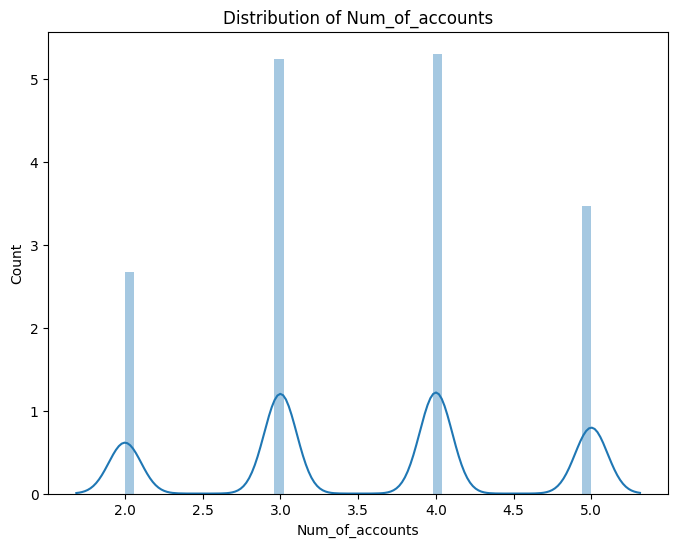

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


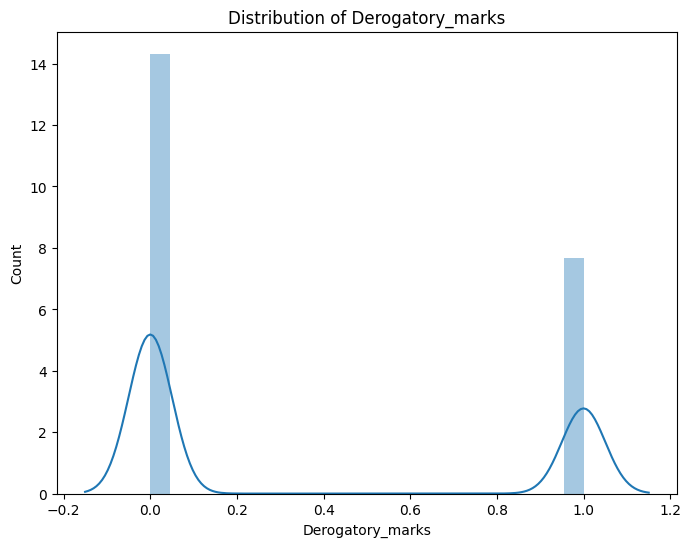

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


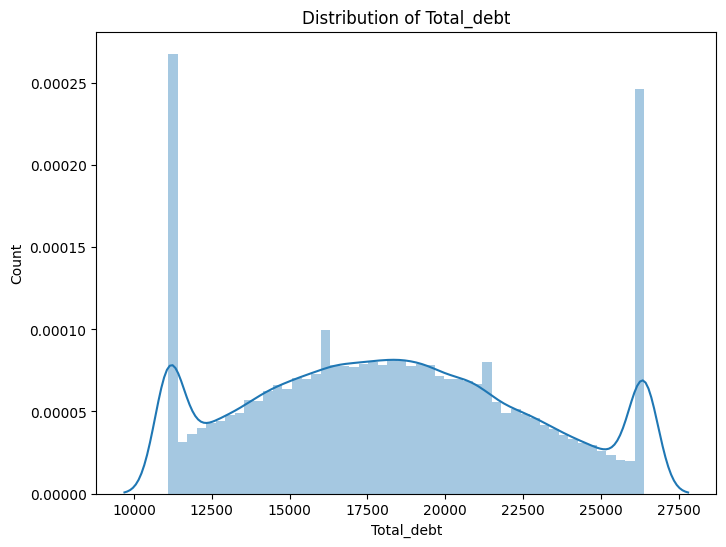

<ipython-input-17-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


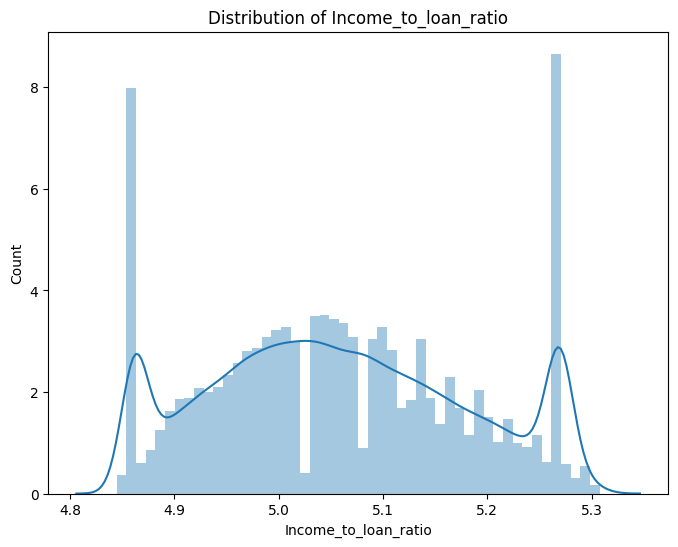

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.distplot(data[feature])
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

In [18]:

X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (77536, 8)
Shape of y (target): (77536,)


In [19]:
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64


# Handling Imbalanced data

In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE

print(y.value_counts())

oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

y_resampled = pd.Series(y_resampled, name=y.name)

print(y_resampled.value_counts())

loan_status
0    75036
1     2500
Name: count, dtype: int64
loan_status
0    75036
1    75036
Name: count, dtype: int64


# Correlation Analysis

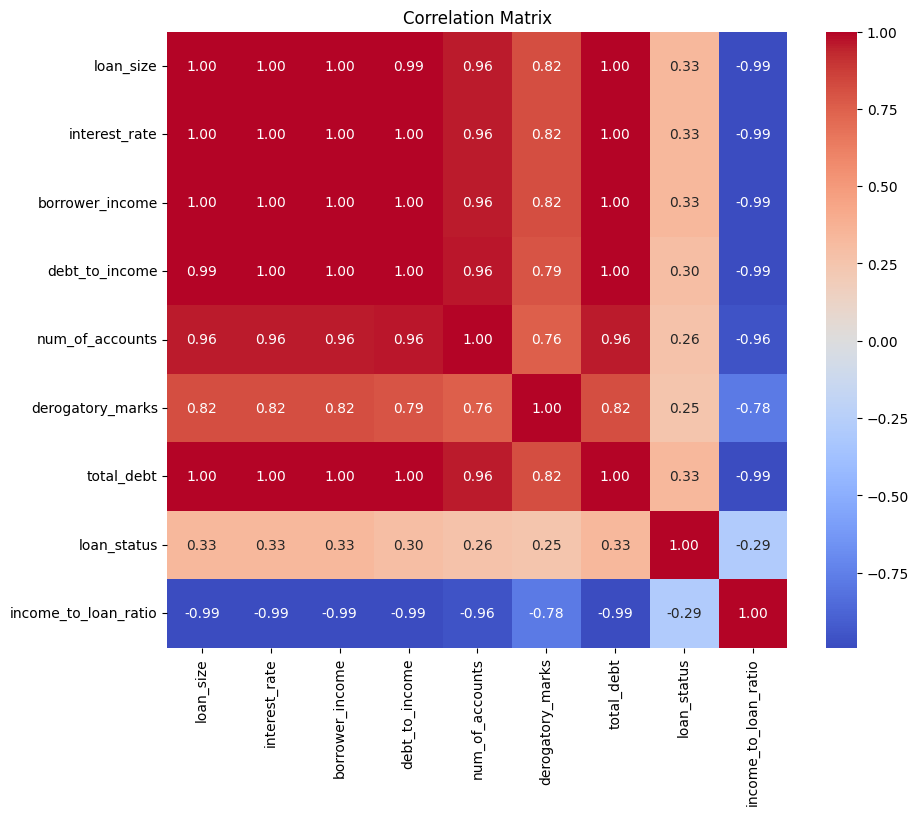

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-22-0f0fd681c026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette="coolwarm")


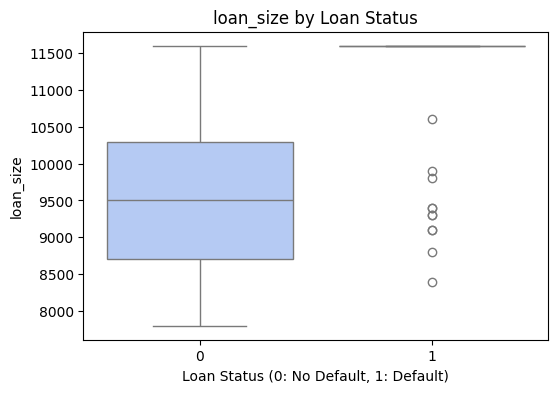

<ipython-input-22-0f0fd681c026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette="coolwarm")


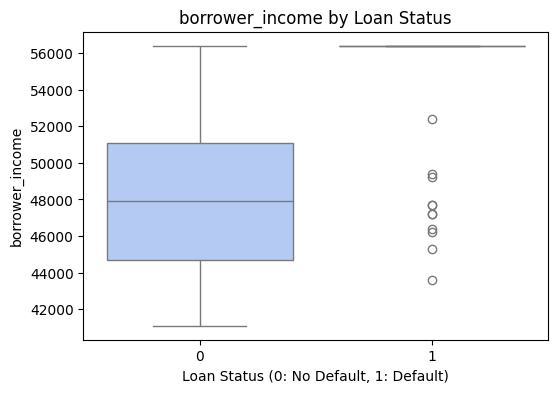

<ipython-input-22-0f0fd681c026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette="coolwarm")


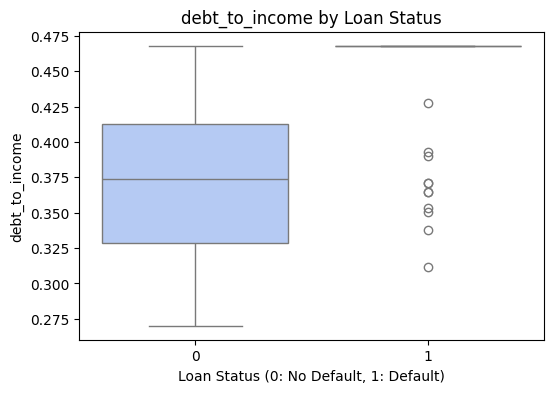

<ipython-input-22-0f0fd681c026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette="coolwarm")


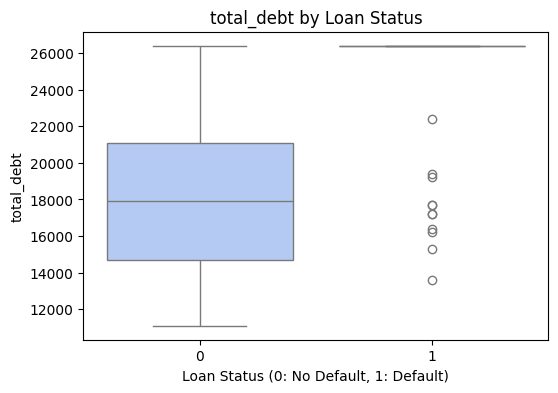

In [22]:
features_to_plot = ['loan_size', 'borrower_income', 'debt_to_income', 'total_debt']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='loan_status', y=feature, palette="coolwarm")
    plt.title(f"{feature} by Loan Status")
    plt.xlabel("Loan Status (0: No Default, 1: Default)")
    plt.ylabel(feature)
    plt.show()

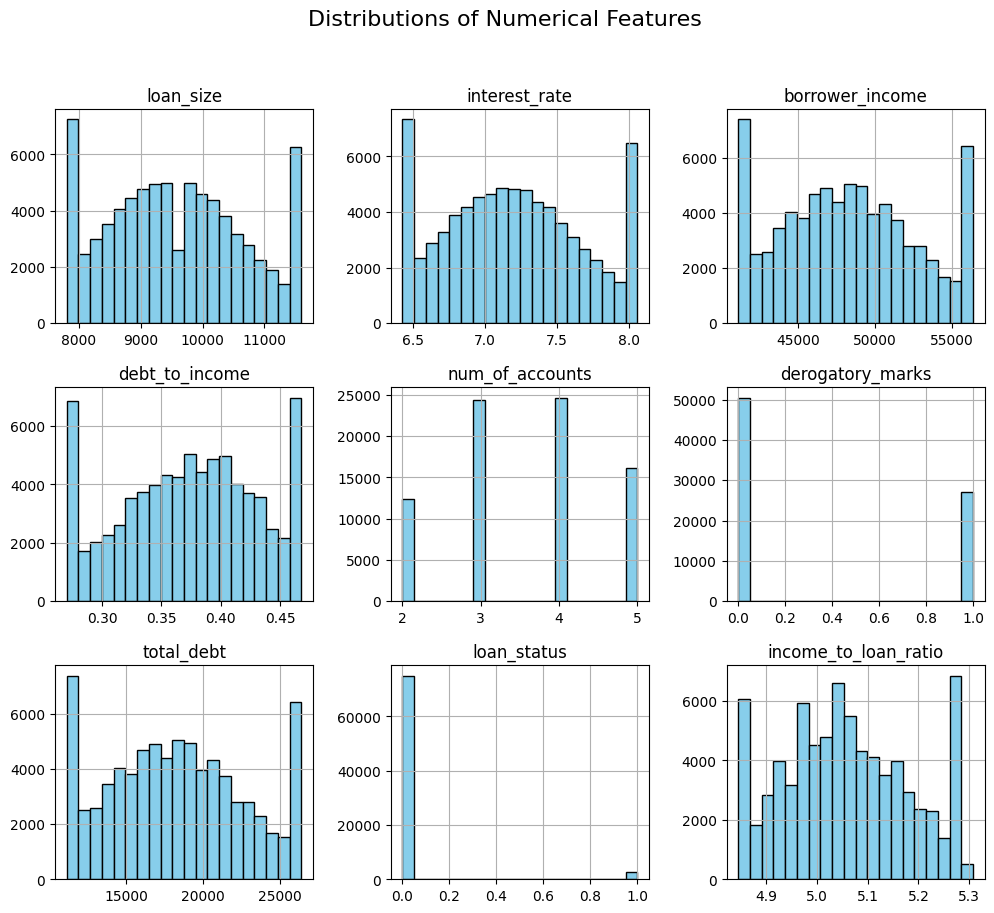

In [23]:
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=54)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Model**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

In [27]:
model=[]
name=[]
res=[]

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

testing_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append('RandomForestClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   16 14940]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9792778341891777


ROC AUC: 0.98


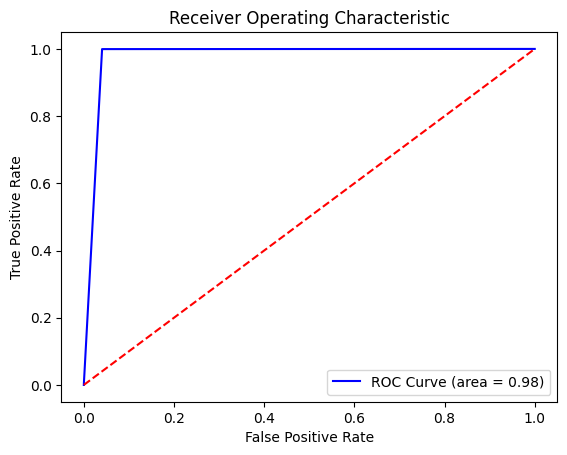

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append(' DecisionTreeClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   58 14898]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9778737154408492


In [31]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append('GradientBoostingClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   29 14927]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9788432260051714


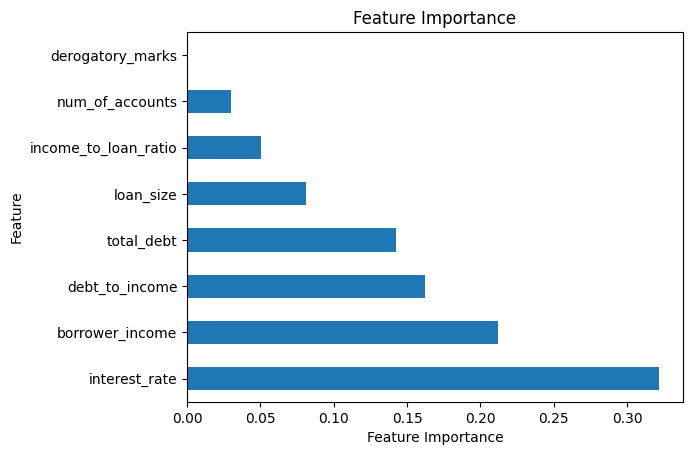

In [32]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with AdaBoost is {testing_accuracy}')

name.append('AdaBoostClassifier')
res.append(testing_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[14451   608]
 [   71 14885]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with AdaBoost is 0.9774391072568429


In [34]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with Logistic Regression is {testing_accuracy}')

name.append('LogisticRegression')
res.append(testing_accuracy)

[[14307   752]
 [   65 14891]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15059
           1       0.95      1.00      0.97     14956

    accuracy                           0.97     30015
   macro avg       0.97      0.97      0.97     30015
weighted avg       0.97      0.97      0.97     30015

The balanced accuracy with Logistic Regression is 0.9728585016790781


['RandomForestClassifier', ' DecisionTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'LogisticRegression']
[0.9792778341891777, 0.9778737154408492, 0.9788432260051714, 0.9774391072568429, 0.9728585016790781]


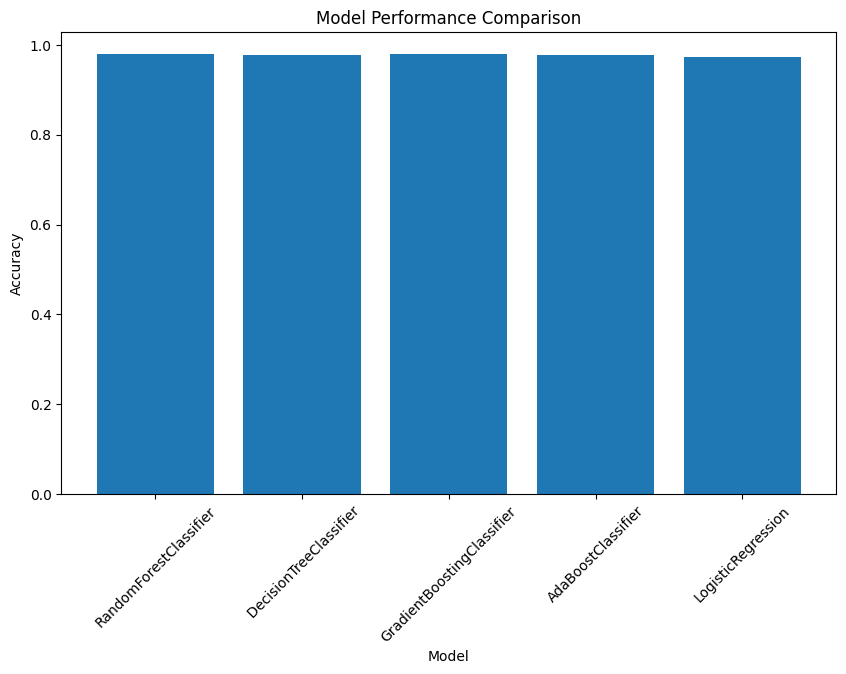

In [35]:
print(name)
print(res)
plt.figure(figsize=(10, 6))
plt.bar(name, res)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

In [36]:
X_train.shape

(120057, 8)








# Ensembling algorithms

In [37]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier()),
    ('gbm', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with stacking is {testing_accuracy}')

with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

print("Stacking model saved successfully!")

[[14451   608]
 [   14 14942]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with stacking is 0.9793446969867172
Stacking model saved successfully!


Stacking Model Performance:
[[14451   608]
 [   22 14934]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy of the Stacking model is 0.9791
Bagging Model Performance:
[[14451   608]
 [   16 14940]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy of the Bagging model is 0.9793


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Model Performance:
[[14451   608]
 [   71 14885]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy of the Boosting model is 0.9774


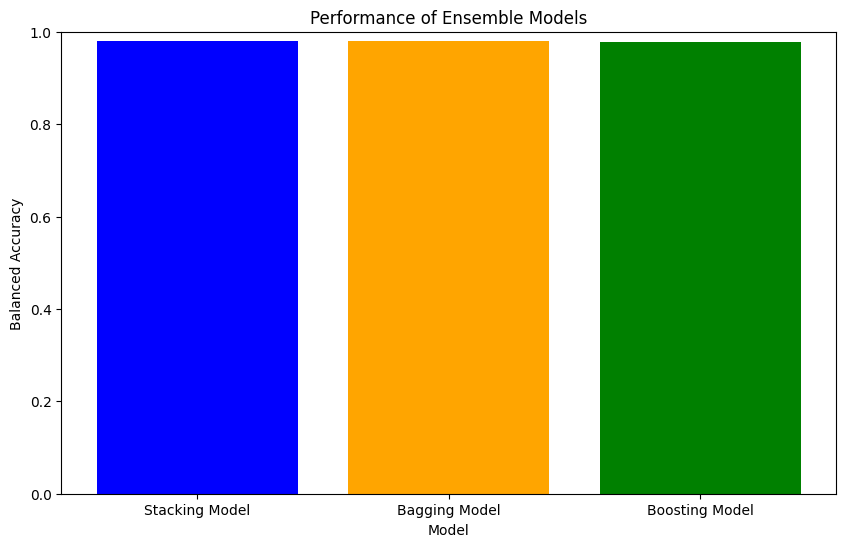

In [38]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)


y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model Performance:")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))
testing_accuracy_stacking = balanced_accuracy_score(y_test, y_pred_stacking)
print(f'The balanced accuracy of the Stacking model is {testing_accuracy_stacking:.4f}')


bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("Bagging Model Performance:")
print(confusion_matrix(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))
testing_accuracy_bagging = balanced_accuracy_score(y_test, y_pred_bagging)
print(f'The balanced accuracy of the Bagging model is {testing_accuracy_bagging:.4f}')

boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

print("Boosting Model Performance:")
print(confusion_matrix(y_test, y_pred_boosting))
print(classification_report(y_test, y_pred_boosting))
testing_accuracy_boosting = balanced_accuracy_score(y_test, y_pred_boosting)
print(f'The balanced accuracy of the Boosting model is {testing_accuracy_boosting:.4f}')

model_names = ['Stacking Model', 'Bagging Model', 'Boosting Model']
model_accuracies = [testing_accuracy_stacking, testing_accuracy_bagging, testing_accuracy_boosting]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.title('Performance of Ensemble Models')
plt.ylim(0, 1)
plt.show()

# Model Optimization

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
Fine-Tuned Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015



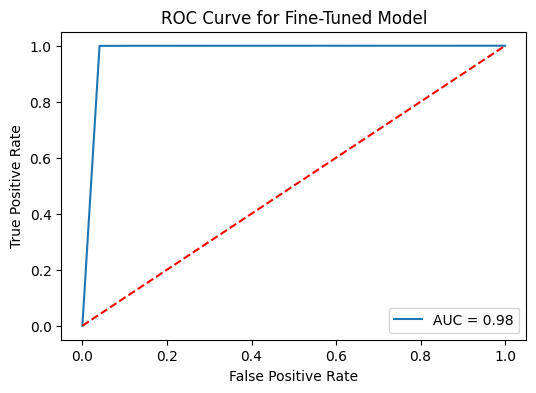

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist,n_iter=50,scoring='roc_auc', cv=3, verbose=2,
                                   n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred_tuned = best_model.predict(X_test)
y_proba_tuned = best_model.predict_proba(X_test)[:, 1]

print("Fine-Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_proba_tuned)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tuned, tpr_tuned, label=f"AUC = {roc_auc_tuned:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fine-Tuned Model")
plt.legend(loc="lower right")
plt.show()

In [40]:
accuracy = (y_pred_tuned == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
